In [1]:
# 라이브러리 가져오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# tips 데이터 가져오기
tips = sns.load_dataset('tips')

In [4]:
# 구조 확인
tips.shape

(244, 7)

In [5]:
# 데이터 샘플 확인
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [6]:
# 컬럼 데이터타입 확인하기
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [8]:
# 명목형 변수, 연속형 변수의 기술통계값 확인 
# describe()
tips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [ ]:
# 각 변수에 대해서 기술통계값으로 확인할 수 있는 의미(특징)
# 범주형 변수 : sex, smoker, day, time
# 연속형 변수 : total_bill, tip, size
# 확인할 사항들 : sex, smoker, day, time 의 카테고리 종류

In [11]:
# 결측치 확인
# 없는 값 : NaN, None
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [14]:
# 범주형 변수 파악하기
# 각 카테고리 파악
tips['sex'].unique()
set(tips['sex'].values)

{'Female', 'Male'}

In [18]:
for col in tips.select_dtypes(include='category'):
    print(col, tips[col].unique())

sex [Female, Male]
Categories (2, object): [Female, Male]
smoker [No, Yes]
Categories (2, object): [No, Yes]
day [Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]
time [Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]


In [ ]:
# 성별 : 남자와 여자 손님 비율/수
# matplotlib
# seaborn

In [ ]:
# 1. df.value_counts() & plot(kind=bar)
# 2. df.value_counts() & plt.bar()
# 3. sns.barplot(df.value_counts())
# 4. sns.countplot(x=col, data=df)

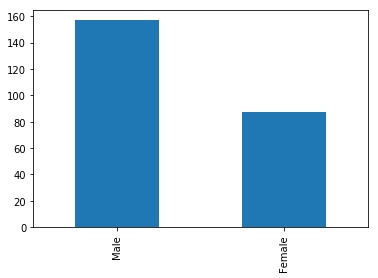

In [20]:
tips['sex'].value_counts().plot(kind='bar')

<BarContainer object of 2 artists>

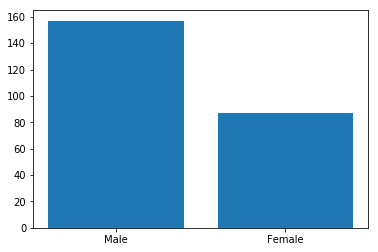

In [21]:
# plt.bar(x, y)
plt.bar(tips['sex'].value_counts().index, tips['sex'].value_counts().values)

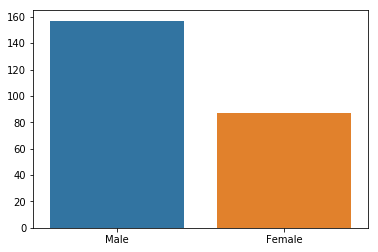

In [22]:
sns.barplot(tips['sex'].value_counts().index, tips['sex'].value_counts().values)

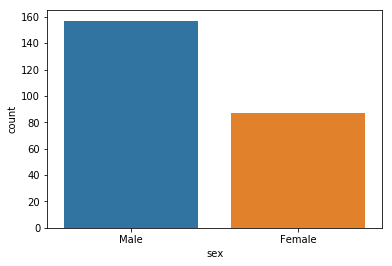

In [23]:
sns.countplot(data=tips, x='sex')

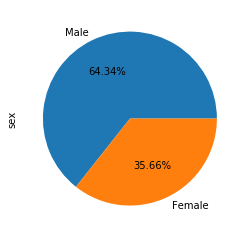

In [33]:
# 각 성별의 전체 대비 비중
# plt.pie(tips['sex'].value_counts(), labels=tips['sex'].value_counts().index,
#        autopct='%.2f%%')
tips['sex'].value_counts().plot(kind='pie', autopct='%.2f%%')

In [ ]:
# 흡연자 : 흡연자와 비흡연자 비율/수
# 요일 : 요일별 방문빈도 수
# 시간대 : 시간대별 방문빈도 수

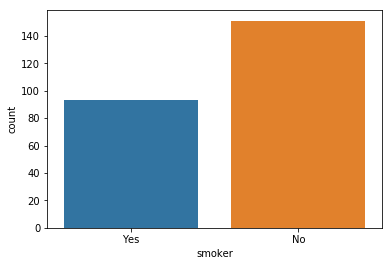

In [34]:
sns.countplot(data=tips, x='smoker')

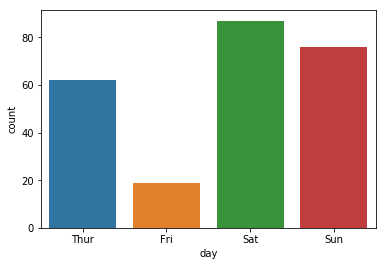

In [35]:
sns.countplot(data=tips, x='day')

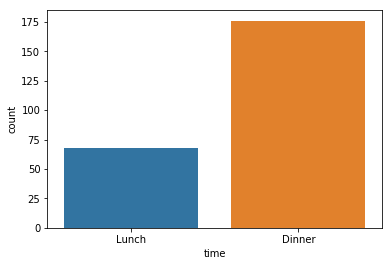

In [36]:
sns.countplot(data=tips, x='time')

In [39]:
tips['size'].describe()

count    244.000000
mean       2.569672
std        0.951100
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: size, dtype: float64

In [40]:
# 요일별(day) 총 손님 수(size)
# 우리 가게에 무슨 요일에 손님이 가장 많이올까?
tips['size'].value_counts()

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

In [43]:
tips[tips['day']=='Sat']['size'].sum()

219

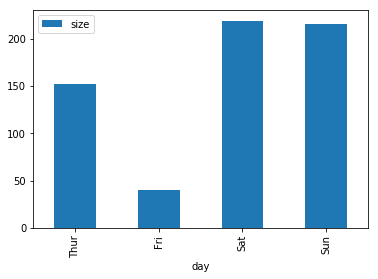

In [46]:
tips.pivot_table(index='day', values='size', aggfunc='sum').plot(kind='bar')

In [49]:
tmp

,size
day,
Thur,152
Fri,40
Sat,219
Sun,216


In [51]:
tmp.reset_index()

,day,size
0,Thur,152
1,Fri,40
2,Sat,219
3,Sun,216


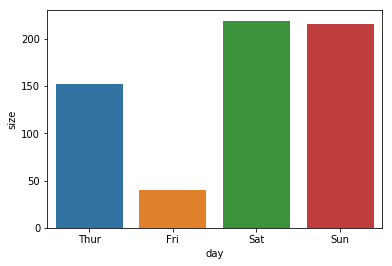

In [48]:
tmp = tips.pivot_table(index='day', values='size', aggfunc='sum')
sns.barplot(data=tmp.reset_index(), x='day', y='size')

In [52]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [53]:
# 요일별 총 손님(size)과 총 팁금액(tip)
# 요일별 총손님 수가 많을 수록 총 팁금액이 많을까?
tips.pivot_table(index='day', values=['size', 'tip'], aggfunc='sum')

,size,tip
day,,
Thur,152,171.83
Fri,40,51.96
Sat,219,260.40
Sun,216,247.39


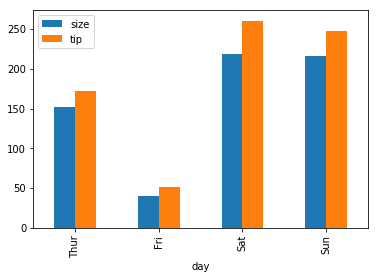

In [54]:
tips.pivot_table(index='day', values=['size', 'tip'], aggfunc='sum').plot(kind='bar')

In [ ]:
# 성별 평균 팁
# 평균 팁을 가장 많이 준 성별은 뭘까?

In [55]:
# 1. 데이터를 가공해서 plot => df.plot(kind='bar')
tips.pivot_table(index='sex', values='tip', aggfunc='mean')

,tip
sex,
Male,3.089618
Female,2.833448


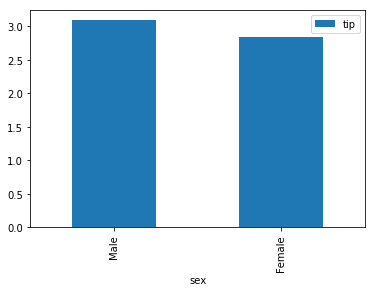

In [56]:
tips.pivot_table(index='sex', values='tip', aggfunc='mean').plot(kind='bar')

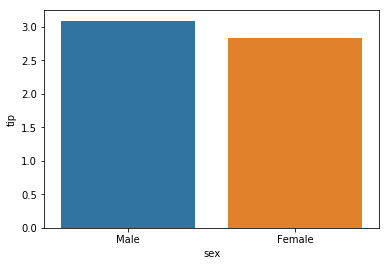

In [58]:
# 2. 데이터를 가공하지 않고 plot => sns.barplot
# estimator=<function mean>
sns.barplot(data=tips, x='sex', y='tip', ci=None)

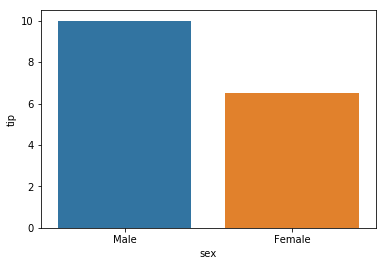

In [59]:
# 성별로 가장 팁을 많이 준 금액
sns.barplot(data=tips, x='sex', y='tip', estimator=np.max, ci=None)

In [ ]:
# 평균 팁이 가장 많은 요일 찾기 
# pivot_table
# sns.barplot

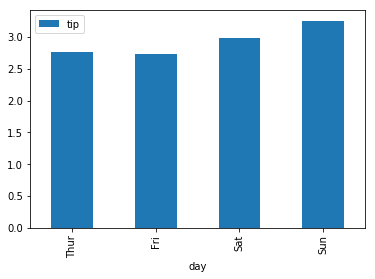

In [61]:
tips.pivot_table(index='day', values='tip', aggfunc='mean').plot(kind='bar')

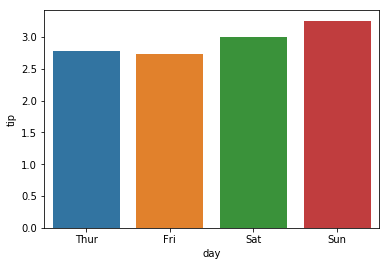

In [62]:
sns.barplot(data=tips, x='day', y='tip', ci=None)

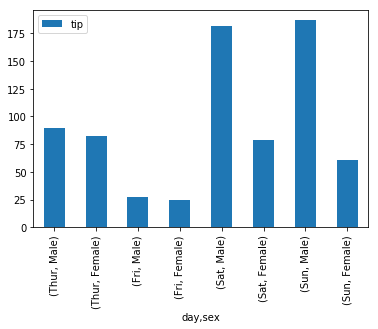

In [68]:
tips.pivot_table(index=['day','sex'], values='tip', aggfunc='sum').plot(kind='bar')

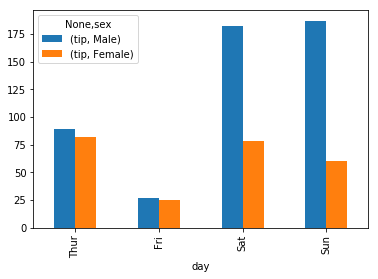

In [67]:
# 요일별 성별 전체 팁 금액 비교
tips.pivot_table(index=['day','sex'], values='tip', aggfunc='sum').unstack().plot(kind='bar')

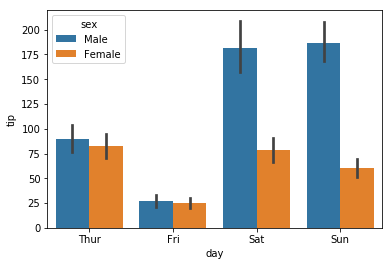

In [70]:
sns.barplot(data=tips,x='day', y='tip', estimator=sum, hue='sex')

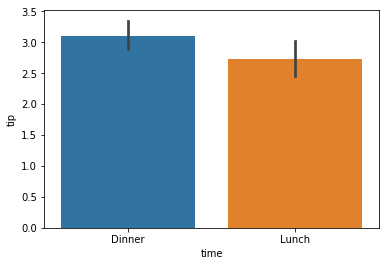

In [72]:
# 시간대별 평균 팁 금액 비교
sns.barplot(x='time', y='tip', data=tips, order=['Dinner', 'Lunch'])

In [73]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

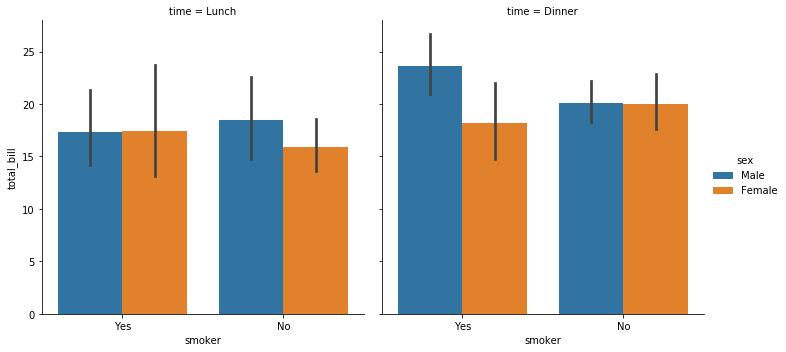

In [76]:
# 시간대 & 성별 & 흡연여부 , 총 3개의 속성을 기준로 평균 지불 금액 비교
# seaborn.catplot()
# col, x, hue => 범주형 데이터를 활용
sns.catplot(data=tips, col='time',x='smoker',y='total_bill',hue='sex',kind='bar')

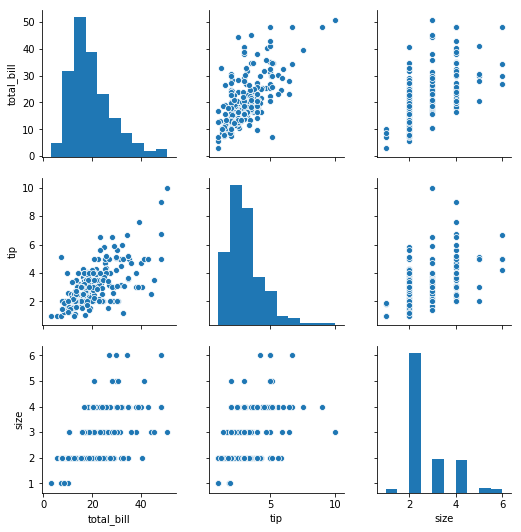

In [77]:
# 양의 상관관계를 가지는 속성 찾기
sns.pairplot(tips)

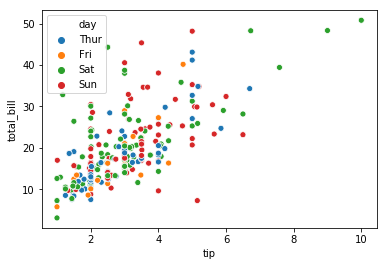

In [82]:
# 양의 상관관계를 가지는 조합 : total_bill, tip
# 해당 속성조합에 대해 범주형 변수를 색깔로 반영해보기
# sex, smoker, time, day
sns.scatterplot(data=tips, x='tip', y='total_bill', hue='day')

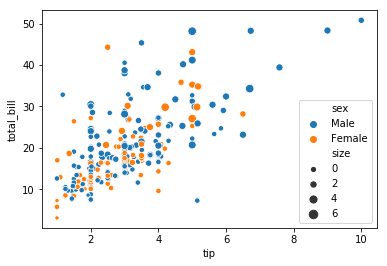

In [83]:
# 양의 상관관계를 가지는 속성 +
# 테이블 당 인원수(size) 속성에 대해 산점도의 크기를 사이즈 속성의 값에 따라 크기 반영
sns.scatterplot(data=tips, x='tip', y='total_bill', hue='sex', size='size')

In [87]:
tips['sex2'] = tips['sex'].map({'Female':10, 'Male':20})

In [92]:
tips['size'].values

array([2, 3, 3, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 3, 3, 3, 3, 2, 2,
       2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2,
       4, 2, 2, 4, 3, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 3, 3,
       2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 1, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 3, 2, 3, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 6, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 5, 6, 2, 2, 3, 2, 2, 2, 2, 2, 3, 4,
       4, 5, 6, 4, 2, 4, 4, 2, 3, 2, 2, 3, 2, 4, 2, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 2, 3, 4, 2, 5, 3, 5, 3, 3, 2, 2, 2, 2, 2, 2, 2, 4,
       2, 2, 3, 2, 2, 2, 4, 3, 3, 4, 2, 2, 3, 4, 4, 2, 3, 2, 5, 2, 2, 4,
       2, 2, 1, 3, 2, 2, 2, 4, 2, 2, 4, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2,
       2, 2], dtype=int64)

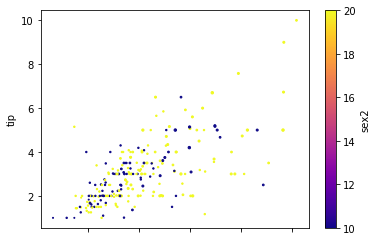

In [95]:
tips.plot(kind='scatter', x='total_bill', y='tip',
          c='sex2', colormap='plasma', s=tips['size'].values)